**Python solutions to Gary Koop's "Analysis of Economic Data" (4th ed., 2013)**

**Chapter 7: Regression with Dummy Variables**

Jakub Janus, [jakub.janus@uek.krakow.pl](jakub.janus@uek.krakow.pl)

# Exercise 7.1
Using the data set HPRICE.XLS, calculate and interpret descriptive statistics and
a correlation matrix for the five dummy variables listed in Example 7.1. How can
you interpret the mean of a dummy variable?

In [1]:
import pandas as pd
hprice = pd.read_excel(r'datasets\HPRICE.xls')
# Rename Y and dummy variables
hprice = hprice.rename(columns = {'sale price': 'Y', 'driveway': 'D1', 'rec room': 'D2', 'basement': 'D3', 'gas': 'D4', 'air cond': 'D5'})
# Descriptive statistics
D_all = hprice[['D1', 'D2', 'D3', 'D4', 'D5']]
D_all.describe()

,D1,D2,D3,D4,D5
count,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.858974,0.177656,0.349817,0.045788,0.316850
std,0.348367,0.382573,0.477349,0.209216,0.465675
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
# Correlation matrix
D_all.corr()

,D1,D2,D3,D4,D5
D1,1.000000,0.091959,0.043428,-0.011942,0.106290
D2,0.091959,1.000000,0.372434,-0.010119,0.136626
D3,0.043428,0.372434,1.000000,0.004677,0.045248
D4,-0.011942,-0.010119,0.004677,1.000000,-0.130350
D5,0.106290,0.136626,0.045248,-0.130350,1.000000


# Exercise 7.2

Interpret the statistical information in Example 7.3. Are all of the explanatory
variables statistically significant?

In [3]:
import statsmodels.api as sm
formula_Y_D_12 = sm.OLS(hprice['Y'], sm.add_constant(hprice[['D1', 'D2']]))
reg_Y_D_12 = formula_Y_D_12.fit()
reg_Y_D_12.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.137     
Dependent Variable: Y                AIC:                12602.0015
Date:               2021-04-01 19:08 BIC:                12614.9093
No. Observations:   546              Log-Likelihood:     -6298.0   
Df Model:           2                F-statistic:        44.41     
Df Residuals:       543              Prob (F-statistic): 1.38e-18  
R-squared:          0.141            Scale:              6.1506e+08
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     47099.0805 2837.6181 16.5981 0.0000 41525.0270 52673.1339
D1        21159.9073 3062.4416  6.9095 0.0000 15144.2233 27175.5912
D2        16023.6859 2788.6279  5.7461 0.0000 10545.8659 21501.5060
-------------------------------------------------------------------
Omnibus:              137.449       Durbin-Watson:          0.895  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       321.949
Skew:                 1.300         Prob(JB):               0.000  
Kurtosis:             5.718         Condition No.:          5      
===================================================================

"""

# Exercise 7.3

Using the house price data from HPRICE.XLS, let the dependent variable (Y) be
the price of a house. The dummy variable D1 = 1 if the house has a driveway (0
otherwise) and D2 = 1 if the house has a recreation room (0 otherwise).

(a) Without using regression techniques, calculate the average price of the four
types of house listed in Example 7.3.

In [4]:
# Type 1: D1 = 1, D2 = 1
type_1_mean = hprice.loc[hprice['D1'] == 1].loc[hprice['D2'] == 1, ['Y']].mean()
# Type 2: D1 = 1, D2 = 0
type_2_mean = hprice.loc[hprice['D1'] == 1].loc[hprice['D2'] == 0, ['Y']].mean()
# Type 3: D1 = 0, D2 = 1
type_3_mean = hprice.loc[hprice['D1'] == 0].loc[hprice['D2'] == 1, ['Y']].mean()
# Type 4: D1 = 0, D2 = 0
type_4_mean = hprice.loc[hprice['D1'] == 0].loc[hprice['D2'] == 0, ['Y']].mean()
# Table
pd.DataFrame([['type_1', type_1_mean.values[0]], ['type_2', type_2_mean.values[0]], ['type_3', type_3_mean.values[0]], ['type_4', type_4_mean.values[0]]], columns=['type', 'mean'])

,type,mean
0,type_1,84753.333333
1,type_2,68147.221636
2,type_3,57071.428571
3,type_4,47704.214286


(b) How do these average prices relate to the regression coefficients and results
in Example 7.3?

In [5]:
coef_const = reg_Y_D_12.params['const']
coef_D1 = reg_Y_D_12.params['D1']
coef_D2 = reg_Y_D_12.params['D2']
reg_type_1 = coef_const + coef_D1 + coef_D2
reg_type_2 = coef_const + coef_D1
reg_type_3 = coef_const + coef_D2
reg_type_4 = coef_const
pd.DataFrame([['type_1', type_1_mean.values[0], reg_type_1], ['type_2', type_2_mean.values[0], reg_type_2], ['type_3', type_3_mean.values[0], reg_type_3], ['type_4', type_4_mean.values[0], reg_type_4]], columns=['type', 'mean', 'regression'])

,type,mean,regression
0,type_1,84753.333333,84282.673721
1,type_2,68147.221636,68258.987771
2,type_3,57071.428571,63122.766448
3,type_4,47704.214286,47099.080498


# Exercise 7.4

Use data set HPRICE.XLS and the five dummy variables, D1 to D5 (i.e. the
dummy variables for whether a house has a driveway, a recreation room, a basement,
gas central heating and air conditioning) listed in Example 7.1.

(a) With five dummy variables, how many different categories of house are possible
(e.g. houses with a driveway, a recreation room, a basement and gas
central heating but no air conditioning comprise one class.) What implications
does this have for interpreting regression results?


In [6]:
house_categories = 2**5
house_categories

32

(b) How would you calculate the number of houses in each category? For instance,
of the 546 houses in the data set, how many have a driveway, gas central
heating and air conditioning but no recreation room and no basement?

In [7]:
houses_summary = []
for D1 in range(0, 2):
    for D2 in range(0, 2):
        for D3 in range(0, 2):
            for D4 in range(0, 2):
                for D5 in range(0, 2):
                    no_houses = len(hprice.loc[(hprice['D1'] == D1) 
                    & (hprice['D2'] == D2) 
                    & (hprice['D3'] == D3) 
                    & (hprice['D4'] == D4) 
                    & (hprice['D5'] == D5)])
                    houses_summary.append([D1, D2, D3, D4, D5, no_houses])
pd.DataFrame(houses_summary,  columns=['D1', 'D2', 'D3', 'D4', 'D5', 'no_houses'])   

,D1,D2,D3,D4,D5,no_houses
0,0,0,0,0,0,42
1,0,0,0,0,1,8
2,0,0,0,1,0,2
3,0,0,0,1,1,0
4,0,0,1,0,0,11
5,0,0,1,0,1,5
6,0,0,1,1,0,2
7,0,0,1,1,1,0
8,0,1,0,0,0,2
9,0,1,0,0,1,0


(c) Run a regression of the price of a house (Y) on the five dummy variables.

In [8]:
formula_Y_D_all = sm.OLS(hprice['Y'], sm.add_constant(D_all))
reg_Y_D_all = formula_Y_D_all.fit()
reg_Y_D_all.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.325     
Dependent Variable: Y                AIC:                12470.8566
Date:               2021-04-01 19:08 BIC:                12496.6723
No. Observations:   546              Log-Likelihood:     -6229.4   
Df Model:           5                F-statistic:        53.55     
Df Residuals:       540              Prob (F-statistic): 3.94e-45  
R-squared:          0.331            Scale:              4.8110e+08
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     40183.6841 2610.1675 15.3951 0.0000 35056.3579 45311.0104
D1        18139.6654 2720.9557  6.6667 0.0000 12794.7104 23484.6203
D2         9614.0806 2675.0455  3.5940 0.0004  4359.3101 14868.8511
D3         5858.2681 2121.0774  2.7619 0.0059  1691.6942 10024.8420
D4        19386.2540 4529.7741  4.2797 0.0000 10488.1163 28284.3917
D5        24337.8383 2063.4441 11.7948 0.0000 20284.4773 28391.1992
-------------------------------------------------------------------
Omnibus:              135.960       Durbin-Watson:          1.180  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       375.202
Skew:                 1.213         Prob(JB):               0.000  
Kurtosis:             6.256         Condition No.:          7      
===================================================================

"""

(d) Discuss the statistical significance of the explanatory variables.

In [9]:
reg_Y_D_all.pvalues < 0.05

const    True
D1       True
D2       True
D3       True
D4       True
D5       True
dtype: bool

(e) Calculate the average price for a few categories of housing (e.g. those with a
driveway, a recreation room and a basement but no gas central heating and
no air conditioning).

In [10]:
houses_average_price = []
for D1 in range(0, 2):
    for D2 in range(0, 2):
        for D3 in range(0, 2):
            for D4 in range(0, 2):
                for D5 in range(0, 2):
                    houses_price = hprice.loc[(hprice['D1'] == D1) 
                    & (hprice['D2'] == D2) 
                    & (hprice['D3'] == D3) 
                    & (hprice['D4'] == D4) 
                    & (hprice['D5'] == D5), 'Y'].mean()
                    houses_average_price.append([D1, D2, D3, D4, D5, houses_price])
pd.DataFrame(houses_average_price,  columns=['D1', 'D2', 'D3', 'D4', 'D5', 'houses_price'])   

,D1,D2,D3,D4,D5,houses_price
0,0,0,0,0,0,43893.928571
1,0,0,0,0,1,53362.500000
2,0,0,0,1,0,36250.000000
3,0,0,0,1,1,NaN
4,0,0,1,0,0,50000.000000
5,0,0,1,0,1,62690.000000
6,0,0,1,1,0,66450.000000
7,0,0,1,1,1,NaN
8,0,1,0,0,0,36500.000000
9,0,1,0,0,1,NaN


(f) Which house characteristic tends to raise the price of a house the most?

In [11]:
reg_Y_D_all.params['D5']

24337.838251003515

# Exercise 7.5
Use data set in HPRICE.XLS. Consider the five dummy variables, D1 to D5, listed
in Example 7.1 and the following four non-dummy explanatory variables:
* X1 = the lot size of the property (in square feet)
* X2 = the number of bedrooms
* X3 = the number of bathrooms
* X4 = the number of storeys (excluding the basement).

(a) Run a regression of Y on D1, . . ., D5, X1, . . ., X4.

In [12]:
hprice = hprice.rename(columns = {'lot size': 'X1', '#bedroom': 'X2', '#bath': 'X3', '#stories': 'X4'})
formula_Y_all = sm.OLS(hprice['Y'], sm.add_constant(hprice[['D1', 'D2', 'D3', 'D4', 'D5', 'X1', 'X2', 'X3', 'X4']]))
reg_Y_all = formula_Y_all.fit()
reg_Y_all.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.633     
Dependent Variable: Y                AIC:                12143.0303
Date:               2021-04-01 19:08 BIC:                12186.0565
No. Observations:   546              Log-Likelihood:     -6061.5   
Df Model:           9                F-statistic:        105.2     
Df Residuals:       536              Prob (F-statistic): 2.05e-112 
R-squared:          0.639            Scale:              2.6203e+08
-------------------------------------------------------------------
           Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
const    -8182.9975 3528.8496 -2.3189 0.0208 -15115.0685 -1250.9264
D1        9477.8199 2110.7939  4.4902 0.0000   5331.3770 13624.2628
D2        4543.8866 1990.3155  2.2830 0.0228    634.1115  8453.6617
D3        7252.6093 1636.0504  4.4330 0.0000   4038.7524 10466.4662
D4       13139.1704 3361.0809  3.9092 0.0001   6536.6640 19741.6768
D5       13612.4566 1624.5447  8.3792 0.0000  10421.2016 16803.7117
X1           4.3318    0.3493 12.4007 0.0000      3.6456     5.0180
X2        2348.7440 1095.5318  2.1439 0.0325    196.6816  4500.8065
X3       14865.4754 1556.2249  9.5523 0.0000  11808.4276 17922.5232
X4        6371.0797  967.8858  6.5825 0.0000   4469.7652  8272.3942
-------------------------------------------------------------------
Omnibus:              109.550       Durbin-Watson:          1.536  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       318.734
Skew:                 0.961         Prob(JB):               0.000  
Kurtosis:             6.212         Condition No.:          30175  
===================================================================
* The condition number is large (3e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

# Exercise 7.6

Use data set HPRICE.XLS. Consider the five dummy variables, D1 to D5, and the
four non-dummy variables, X1 to X4, discussed in Exercise 7.5.

(a) Experiment with different configurations of these explanatory variables with
some interaction terms (e.g. try including 10 explanatory variables: D1 to D5,
X1 to X4 and an interaction term, such as, Z = D1X2).

In [13]:
hprice['D1X2'] = hprice['D1']*hprice['X2']
reg_inter = sm.OLS(hprice['Y'], sm.add_constant(hprice[['D1', 'D2', 'D3', 'D4', 'D5', 'X1', 'X2', 'X3', 'X4', 'D1X2']]))
reg_inter_fit = reg_inter.fit()
reg_inter_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.635     
Dependent Variable: Y                AIC:                12140.2429
Date:               2021-04-01 19:08 BIC:                12187.5717
No. Observations:   546              Log-Likelihood:     -6059.1   
Df Model:           10               F-statistic:        95.83     
Df Residuals:       535              Prob (F-statistic): 2.12e-112 
R-squared:          0.642            Scale:              2.6023e+08
-------------------------------------------------------------------
           Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
const     4999.5810 7017.8682  0.7124 0.4765  -8786.3755 18785.5374
D1       -6366.8494 7596.6232 -0.8381 0.4023 -21289.7168  8556.0181
D2        4218.6253 1989.1122  2.1209 0.0344    311.1974  8126.0532
D3        7429.2705 1632.4452  4.5510 0.0000   4222.4821 10636.0588
D4       13429.7558 3352.1780  4.0063 0.0001   6844.7105 20014.8012
D5       13556.5333 1619.1540  8.3726 0.0000  10375.8543 16737.2124
X1           4.3059    0.3483 12.3616 0.0000      3.6216     4.9901
X2       -1980.3724 2273.6752 -0.8710 0.3841  -6446.7983  2486.0535
X3       14759.1141 1551.6385  9.5120 0.0000  11711.0630 17807.1652
X4        6336.2109  964.6857  6.5682 0.0000   4441.1746  8231.2472
D1X2      5345.3506 2462.5832  2.1706 0.0304    507.8324 10182.8687
-------------------------------------------------------------------
Omnibus:              105.276       Durbin-Watson:          1.529  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       303.645
Skew:                 0.927         Prob(JB):               0.000  
Kurtosis:             6.148         Condition No.:          85168  
===================================================================
* The condition number is large (9e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Using R-style regression model formulas.

In [14]:
import statsmodels.formula.api as smf
reg_inter = smf.ols(formula = 'Y ~ D1 + D2 + D3 + D4 + D5 + X1 + X2 + X3 + X4 + D1*X2', data = hprice)
reg_inter_fit = reg_inter.fit()
reg_inter_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.635     
Dependent Variable:  Y                AIC:                12140.2429
Date:                2021-04-01 19:08 BIC:                12187.5717
No. Observations:    546              Log-Likelihood:     -6059.1   
Df Model:            10               F-statistic:        95.83     
Df Residuals:        535              Prob (F-statistic): 2.12e-112 
R-squared:           0.642            Scale:              2.6023e+08
--------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
--------------------------------------------------------------------
Intercept  4999.5810 7017.8682  0.7124 0.4765  -8786.3755 18785.5374
D1        -6366.8494 7596.6232 -0.8381 0.4023 -21289.7168  8556.0181
D2         4218.6253 1989.1122  2.1209 0.0344    311.1974  8126.0532
D3         7429.2705 1632.4452  4.5510 0.0000   4222.4821 10636.0588
D4        13429.7558 3352.1780  4.0063 0.0001   6844.7105 20014.8012
D5        13556.5333 1619.1540  8.3726 0.0000  10375.8543 16737.2124
X1            4.3059    0.3483 12.3616 0.0000      3.6216     4.9901
X2        -1980.3724 2273.6752 -0.8710 0.3841  -6446.7983  2486.0535
X3        14759.1141 1551.6385  9.5120 0.0000  11711.0630 17807.1652
X4         6336.2109  964.6857  6.5682 0.0000   4441.1746  8231.2472
D1:X2      5345.3506 2462.5832  2.1706 0.0304    507.8324 10182.8687
--------------------------------------------------------------------
Omnibus:               105.276       Durbin-Watson:          1.529  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       303.645
Skew:                  0.927         Prob(JB):               0.000  
Kurtosis:              6.148         Condition No.:          85168  
====================================================================
* The condition number is large (9e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

(b) Discuss which variables are statistically significant.

In [15]:
reg_inter_fit.pvalues > 0.05

Intercept     True
D1            True
D2           False
D3           False
D4           False
D5           False
X1           False
X2            True
X3           False
X4           False
D1:X2        False
dtype: bool

(c) Which of the characteristics measured by the dummies has the largest effect
on housing prices?

In [16]:
params = reg_inter_fit.params
params2 = params[['D1', 'D2', 'D3', 'D4', 'D5']]
print(params2.idxmax(), params2.max())

D5 13556.533323792208


(d) Choose particular configurations of the dummy variables (e.g. one indicating
a house with a driveway, no recreation room, a basement, no gas central
heating and no air conditioner) and write out the formula for the regression
line.

In [17]:
params3 = params[['Intercept', 'D1', 'D3']]
sum(params3)

6062.002073573076

# Exercise 7.7
WAGEDISC.XLS contains data on N = 100 employees in a particular occupation.
Suppose that interest centers on investigating the factors that explain salary differences
with a view to addressing the issue of sex discrimination in this occupation.
The data set contains the following variables:
* Y = salary (measured in thousands of dollars)
* X1 = education level (measured in years of schooling)
* X2 = experience level (measured in years of employment)
* D = sex (1 for male, 0 for female).

(a) Calculate and discuss descriptive statistics for this data set. For instance, what
is the mean salary?

In [18]:
wagedisc = pd.read_excel(r'datasets\WAGEDISC.xls').drop([0]).reset_index().drop(['index', 'Unnamed: 0'], axis = 1).astype(float)
wagedisc = wagedisc.rename(columns = {'Salary': 'Y', 'Education': 'X1', 'Experience': 'X2', 'Sex': 'D'})
wagedisc.describe()

,Y,X1,X2,D
count,100.000000,100.000000,100.000000,100.000000
mean,22.410165,2.880000,1.190000,0.310000
std,2.663674,3.568323,2.364275,0.464823
min,16.812000,0.000000,0.000000,0.000000
25%,20.810850,0.000000,0.000000,0.000000
50%,21.862850,2.000000,0.000000,0.000000
75%,23.644625,4.000000,1.000000,1.000000
max,32.359500,20.000000,15.000000,1.000000


(b) Calculate the mean salary for female employees and male employees separately.
Compare.

In [19]:
pd.DataFrame([wagedisc[wagedisc['D'] == 0].mean(), wagedisc[wagedisc['D'] == 1].mean()])

,Y,X1,X2,D
0,21.643083,2.739130,0.173913,0.0
1,24.117542,3.193548,3.451613,1.0


(c) Run a simple regression of Y on D. Is the slope coefficient in this regression
statistically significant? Compare your regression result with your finding in
part (b). Can you use these findings to conclude that women are discriminated
against in this occupation?

In [20]:
reg_Y_D = smf.ols(formula = 'Y ~ D', data = wagedisc)
reg_Y_D_fit = reg_Y_D.fit()
reg_Y_D_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.178   
Dependent Variable: Y                AIC:                462.0885
Date:               2021-04-01 19:08 BIC:                467.2989
No. Observations:   100              Log-Likelihood:     -229.04 
Df Model:           1                F-statistic:        22.46   
Df Residuals:       98               Prob (F-statistic): 7.27e-06
R-squared:          0.186            Scale:              5.8311  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     21.6431    0.2907  74.4504  0.0000  21.0662  22.2200
D              2.4745    0.5221   4.7392  0.0000   1.4383   3.5106
-----------------------------------------------------------------
Omnibus:              19.262       Durbin-Watson:          1.970 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       25.762
Skew:                 0.944        Prob(JB):               0.000 
Kurtosis:             4.619        Condition No.:          2     
=================================================================

"""

(d) Run a multiple regression of Y on X1, X2 and D. Write a short report outlining
your findings and addressing the issue of wage discrimination in this
occupation. Are your results statistically significant?

In [21]:
reg_Y_D_X1_X2 = smf.ols(formula = 'Y ~ D + X1 + X2', data = wagedisc)
reg_Y_D_X1_X2_fit = reg_Y_D_X1_X2.fit()
reg_Y_D_X1_X2_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.858   
Dependent Variable: Y                AIC:                288.5270
Date:               2021-04-01 19:08 BIC:                298.9477
No. Observations:   100              Log-Likelihood:     -140.26 
Df Model:           3                F-statistic:        200.2   
Df Residuals:       96               Prob (F-statistic): 3.54e-41
R-squared:          0.862            Scale:              1.0082  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    20.1276    0.1445  139.3310  0.0000  19.8409  20.4144
D            -0.2669    0.2851   -0.9361  0.3516  -0.8328   0.2990
X1            0.5046    0.0284   17.7652  0.0000   0.4482   0.5610
X2            0.7664    0.0560   13.6950  0.0000   0.6553   0.8775
-----------------------------------------------------------------
Omnibus:               1.177        Durbin-Watson:          1.995
Prob(Omnibus):         0.555        Jarque-Bera (JB):       0.869
Skew:                  -0.225       Prob(JB):               0.648
Kurtosis:              3.079        Condition No.:          14   
=================================================================

"""

(e) Compare your results in part (d) to the results in part (c). Why do they differ?
Hint: Calculate a correlation matrix for all the explanatory variables and think
intuitively about what the correlations mean.

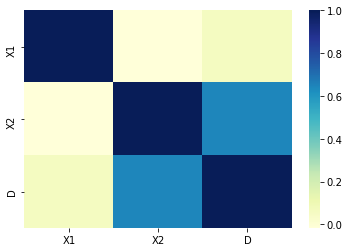

In [23]:
import seaborn as sns
explanatory = wagedisc.drop('Y', axis = 1)
cor_explanatory = explanatory.corr()
sns.heatmap(cor_explanatory, cmap = "YlGnBu");

(f) Construct a new variable Z = DX2 and run a regression of Y on X1, X2, D
and Z. Is Z statistically significant? How would the short report you wrote
in part (d) change? Explain verbally what the coefficient on Z measures.

In [24]:
reg_Y_D_X1_X2_Z = smf.ols(formula = 'Y ~ D + X1 + X2 + D*X2', data = wagedisc)
reg_Y_D_X1_X2_Z_fit = reg_Y_D_X1_X2_Z.fit()
reg_Y_D_X1_X2_Z_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.863   
Dependent Variable: Y                AIC:                285.4957
Date:               2021-04-01 19:08 BIC:                298.5215
No. Observations:   100              Log-Likelihood:     -137.75 
Df Model:           4                F-statistic:        157.5   
Df Residuals:       95               Prob (F-statistic): 5.04e-41
R-squared:          0.869            Scale:              0.96887 
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    20.0109    0.1511  132.4290  0.0000  19.7109  20.3109
D            -0.0800    0.2920   -0.2742  0.7846  -0.6596   0.4996
X1            0.5078    0.0279   18.2129  0.0000   0.4524   0.5631
X2            1.3874    0.2858    4.8547  0.0000   0.8200   1.9547
D:X2         -0.6442    0.2910   -2.2141  0.0292  -1.2219  -0.0666
-----------------------------------------------------------------
Omnibus:               1.038        Durbin-Watson:          1.980
Prob(Omnibus):         0.595        Jarque-Bera (JB):       0.597
Skew:                  -0.152       Prob(JB):               0.742
Kurtosis:              3.227        Condition No.:          21   
=================================================================

"""